# Keep fastai install up to date

In [6]:
!pip3 install -Uq fastai duckduckgo_search

![xkcd](https://imgs.xkcd.com/comics/account_problems.png)

In [14]:
# function to search duckduck go for images
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

#Test
urls = search_images('bird photos', max_images=3)
urls

Searching for 'bird photos'


(#3) ['https://2.bp.blogspot.com/-LZ4VixDdVoE/Tq0ZhPycLsI/AAAAAAAADDM/OKyayfW-z4U/s1600/beautiful_Birds_wallpapers_pictures_Kingfisher_Lilac+Breasted+Roller+Bird.JPG','https://chilternchatter.com/wp-content/uploads/2018/01/RED-Bird.jpg','http://hdqwalls.com/wallpapers/colorful-parrot-bird.jpg']

url=https://www.decorharrogate.co.uk/images/large/Full-Fringed-Shades-Blue-African-Crane-Web.jpg?scale.width=56


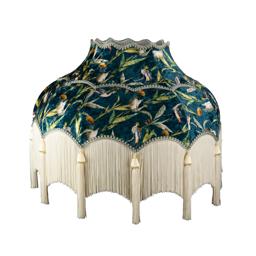

In [45]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=True)
print(f"url={urls[0]}")

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos'


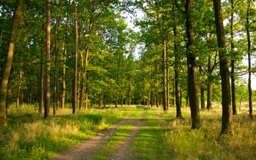

In [16]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)


In [ ]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep
from urllib.parse import urlparse

for o in searches:
    dest = (path/o)  #Path extend :)
    dest.mkdir(exist_ok=True, parents=True)
    for pt in ["photo", "sun photo", "shade photo"]:
        urls=[ u for u in search_images(f'{o} {pt}') if any(urlparse(u).path.endswith(ext) for ext in [".jpg",".jpeg", "png"]) ]
        print(f"  Downloading {len(urls)} into {dest}")
        #print(urls)
        download_images(dest, urls=urls)
        sleep(4)  # Pause between searches to avoid over-loading server
    failed = verify_images(get_image_files(dest))
    failed.map(Path.unlink)
    print(f"  Deleted {len(failed)} broken images
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


'done'

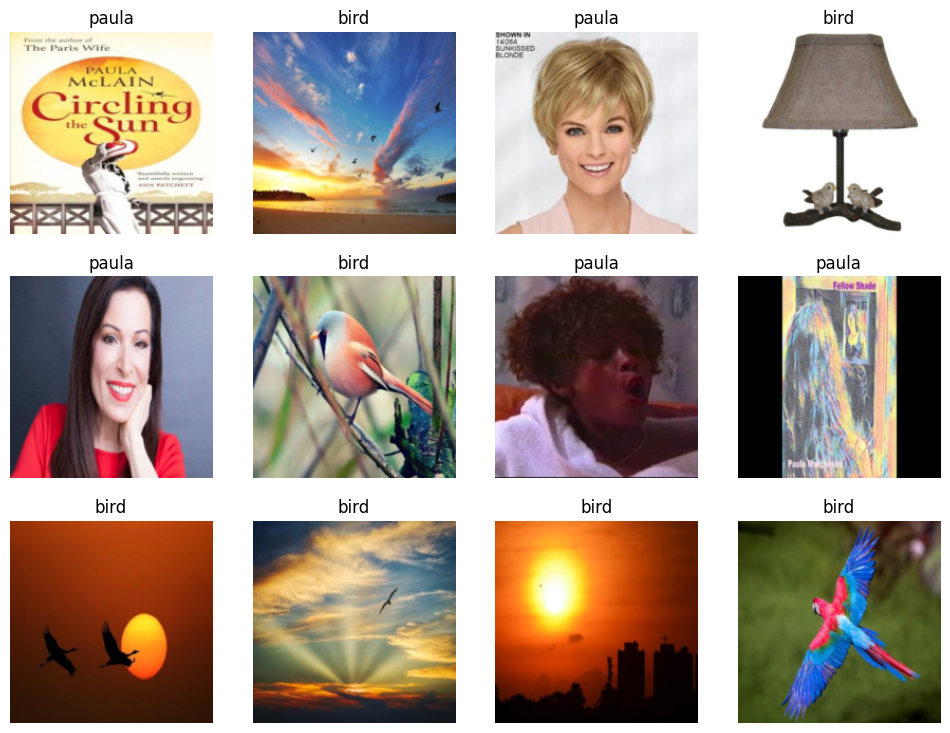

In [46]:
# loads from path
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  #use folder as name
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)
"done"

In [38]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [41]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9996


Simple plot


In [47]:
a = 1
b = a + 1
c = b + a + 1
d = c + b + a + 1
a, b, c ,d

(1, 2, 4, 8)

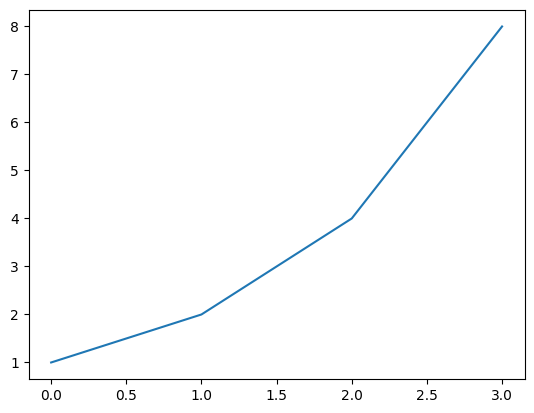

In [48]:
import matplotlib.pyplot as plt

plt.plot([a,b,c,d])
plt.show()